In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"C:\Users\future\Downloads\Test (1).csv"
bigmart_data = pd.read_csv(file_path)


In [3]:
# Data Overview
print(bigmart_data.head())

  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDW58       20.750          Low Fat         0.007565  Snack Foods   
1           FDW14        8.300              reg         0.038428        Dairy   
2           NCN55       14.600          Low Fat         0.099575       Others   
3           FDQ58        7.315          Low Fat         0.015388  Snack Foods   
4           FDY38          NaN          Regular         0.118599        Dairy   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  107.8622            OUT049                       1999      Medium   
1   87.3198            OUT017                       2007         NaN   
2  241.7538            OUT010                       1998         NaN   
3  155.0340            OUT017                       2007         NaN   
4  234.2300            OUT027                       1985      Medium   

  Outlet_Location_Type        Outlet_Type  
0               Tier 1  Supermarket 

In [5]:
print(bigmart_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB
None


In [7]:
print(bigmart_data.isnull().sum())


Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64


In [9]:
# Data Cleaning
# Fill missing values for Item_Weight with mean
bigmart_data['Item_Weight'].fillna(bigmart_data['Item_Weight'].mean(), inplace=True)

# Fill missing values for Outlet_Size with mode
bigmart_data['Outlet_Size'].fillna(bigmart_data['Outlet_Size'].mode()[0], inplace=True)

# Check for duplicates
print(f"Number of duplicates: {bigmart_data.duplicated().sum()}")
bigmart_data.drop_duplicates(inplace=True)


Number of duplicates: 0


C:\Users\future\AppData\Local\Temp\ipykernel_19496\2783195835.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bigmart_data['Item_Weight'].fillna(bigmart_data['Item_Weight'].mean(), inplace=True)
C:\Users\future\AppData\Local\Temp\ipykernel_19496\2783195835.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting val

In [11]:
# Convert categorical variables
bigmart_data['Outlet_Size'] = bigmart_data['Outlet_Size'].astype('category')
bigmart_data['Outlet_Location_Type'] = bigmart_data['Outlet_Location_Type'].astype('category')


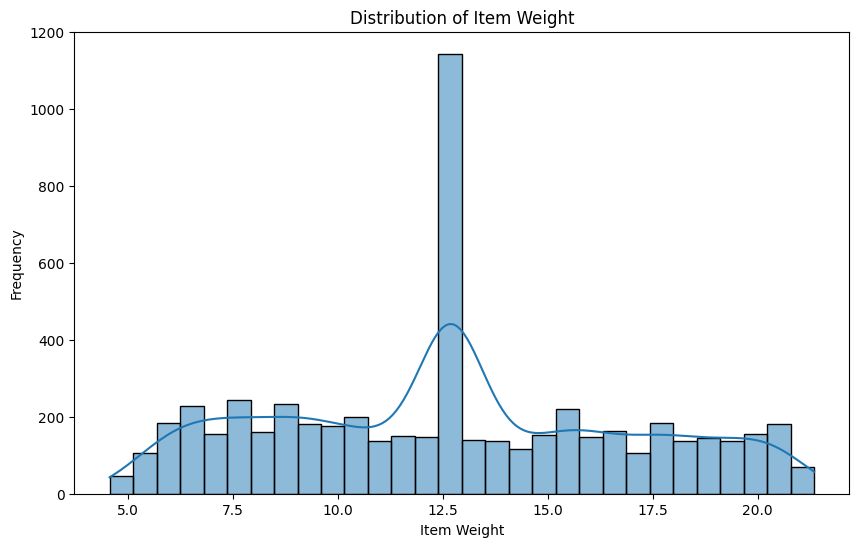

In [15]:

# 1. Distribution of Item Weight
plt.figure(figsize=(10, 6))
sns.histplot(bigmart_data['Item_Weight'], bins=30, kde=True)
plt.title('Distribution of Item Weight')
plt.xlabel('Item Weight')
plt.ylabel('Frequency')
plt.show()



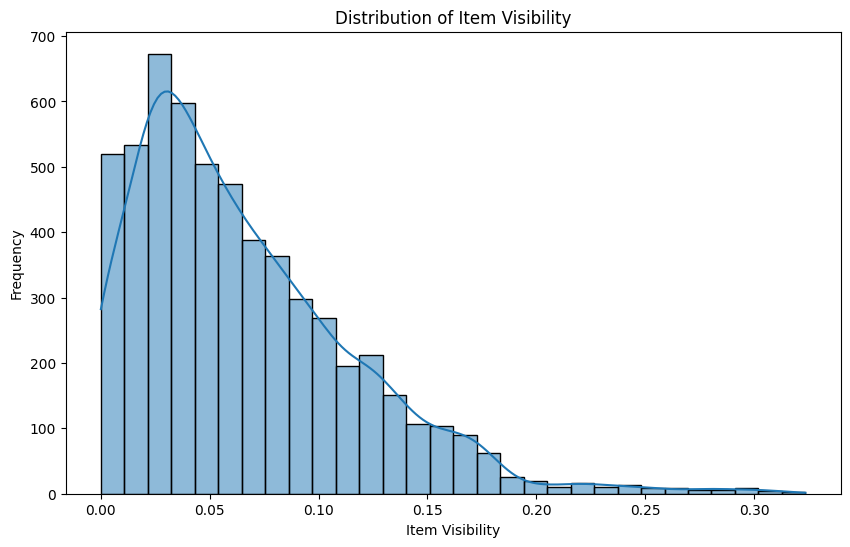

In [19]:
# 2. Item Visibility Distribution
plt.figure(figsize=(10, 6))
sns.histplot(bigmart_data['Item_Visibility'], bins=30, kde=True)
plt.title('Distribution of Item Visibility')
plt.xlabel('Item Visibility')
plt.ylabel('Frequency')
plt.show()


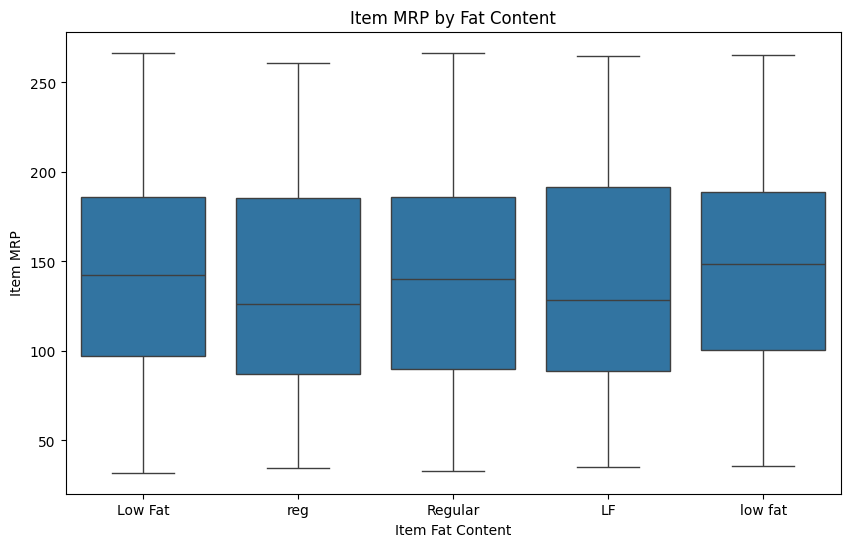

In [21]:
# 3. Boxplot of Item MRP by Item Fat Content
plt.figure(figsize=(10, 6))
sns.boxplot(x='Item_Fat_Content', y='Item_MRP', data=bigmart_data)
plt.title('Item MRP by Fat Content')
plt.xlabel('Item Fat Content')
plt.ylabel('Item MRP')
plt.show()


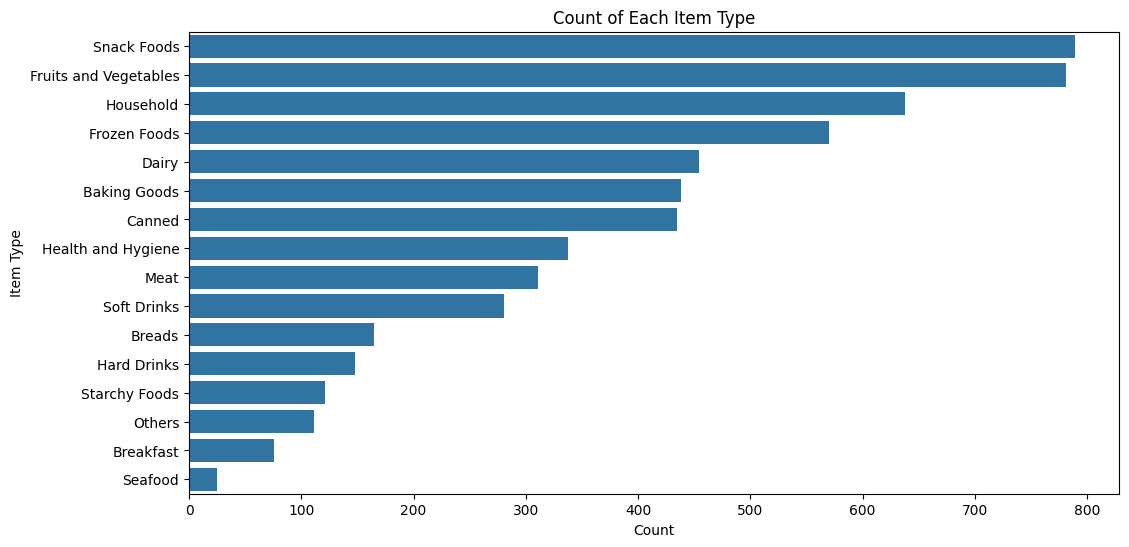

In [23]:
# 4. Count of Item Types
plt.figure(figsize=(12, 6))
sns.countplot(y='Item_Type', data=bigmart_data, order=bigmart_data['Item_Type'].value_counts().index)
plt.title('Count of Each Item Type')
plt.xlabel('Count')
plt.ylabel('Item Type')
plt.show()

C:\Users\future\AppData\Local\Temp\ipykernel_19496\3981844901.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_sales_by_outlet_size = bigmart_data.groupby('Outlet_Size')['Item_MRP'].mean().reset_index()


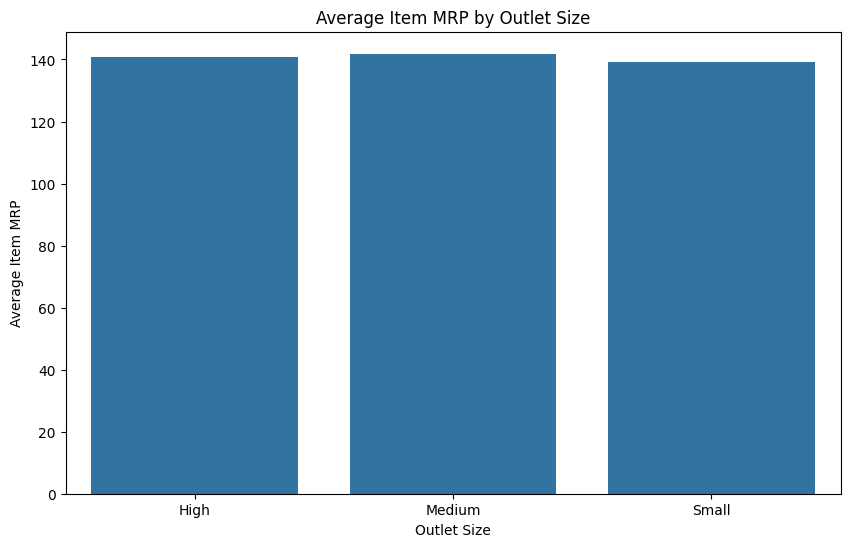

In [25]:
# 5. Average Sales by Outlet Size
avg_sales_by_outlet_size = bigmart_data.groupby('Outlet_Size')['Item_MRP'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Outlet_Size', y='Item_MRP', data=avg_sales_by_outlet_size)
plt.title('Average Item MRP by Outlet Size')
plt.xlabel('Outlet Size')
plt.ylabel('Average Item MRP')
plt.show()

C:\Users\future\AppData\Local\Temp\ipykernel_19496\1271135032.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_location = bigmart_data.groupby('Outlet_Location_Type')['Item_MRP'].sum().reset_index()


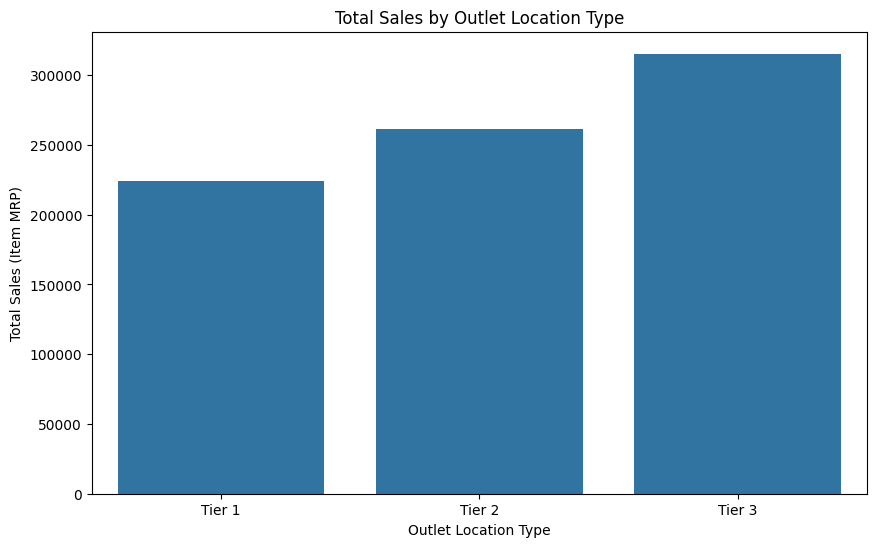

In [27]:
# 6. Sales by Outlet Location Type
sales_by_location = bigmart_data.groupby('Outlet_Location_Type')['Item_MRP'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Outlet_Location_Type', y='Item_MRP', data=sales_by_location)
plt.title('Total Sales by Outlet Location Type')
plt.xlabel('Outlet Location Type')
plt.ylabel('Total Sales (Item MRP)')
plt.show()

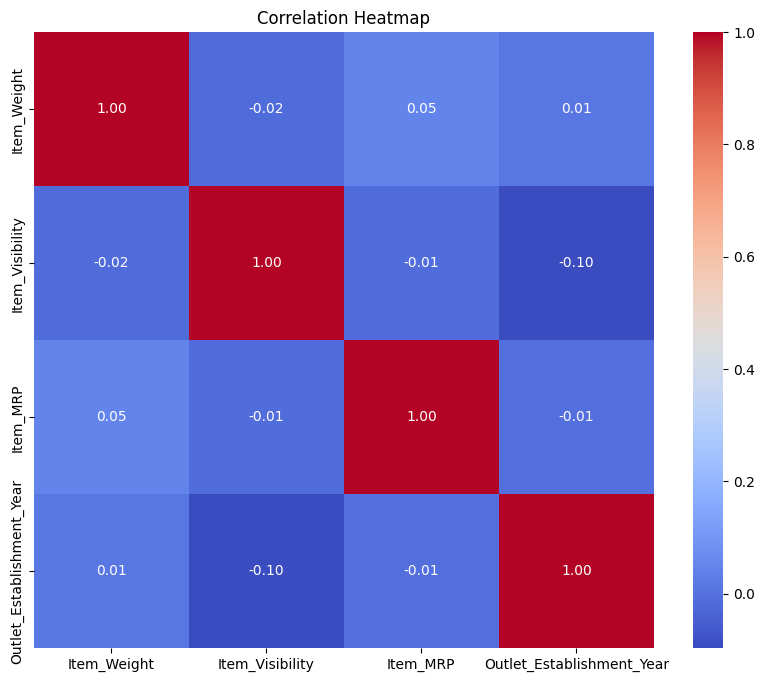

In [33]:
# 7. Correlation Heatmap
import numpy  as np
plt.figure(figsize=(10, 8))

# Selecting only numeric columns for correlation
numeric_columns = bigmart_data.select_dtypes(include=[np.number])
corr_matrix = numeric_columns.corr()

# Creating the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [35]:
# Convert 'Item_MRP' to a numeric type if it's not already
bigmart_data['Item_MRP'] = pd.to_numeric(bigmart_data['Item_MRP'], errors='coerce')

# Calculate total sales
total_sales = (bigmart_data['Item_MRP'] * bigmart_data['Item_Visibility']).sum()

# Calculate average sales per outlet
avg_sales_per_outlet = bigmart_data.groupby('Outlet_Identifier')['Item_MRP'].mean()

# Identify top selling items
top_selling_items = bigmart_data.groupby('Item_Identifier')['Item_MRP'].sum().nlargest(10)

# Sales by Outlet Type
sales_by_outlet_type = bigmart_data.groupby('Outlet_Type')['Item_MRP'].sum()

# Display results
print(f"Total Sales: ${total_sales:,.2f}")
print(f"Average Sales per Outlet:\n{avg_sales_per_outlet}")
print(f"Top Selling Items:\n{top_selling_items}")
print(f"Sales by Outlet Type:\n{sales_by_outlet_type}")


Total Sales: $52,370.69
Average Sales per Outlet:
Outlet_Identifier
OUT010    141.732965
OUT013    140.681858
OUT017    143.366926
OUT018    139.983201
OUT019    142.200334
OUT027    142.826241
OUT035    138.084348
OUT045    140.717908
OUT046    138.968874
OUT049    142.461450
Name: Item_MRP, dtype: float64
Top Selling Items:
Item_Identifier
FDP15    2055.5640
DRM11    1825.1946
NCQ29    1823.9946
FDG28    1714.2008
DRE01    1693.6584
FDU43    1668.2948
FDY58    1600.8858
FDY14    1587.3356
NCL06    1566.6564
FDK46    1557.6720
Name: Item_MRP, dtype: float64
Sales by Outlet Type:
Outlet_Type
Grocery Store        102495.7148
Supermarket Type1    523024.3090
Supermarket Type2     86509.6182
Supermarket Type3     89123.5742
Name: Item_MRP, dtype: float64
